In [17]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
dl = pd.read_csv("logs/resnet_perturbation.csv")

In [7]:
dl.head()

,Perturbation,Value,Loss,Accuracy,F1-Macro
0,Brightness Decrease,0.0,1.101683,0.669623,0.669508
1,Brightness Decrease,5.0,1.101935,0.662971,0.663016
2,Brightness Decrease,10.0,1.107042,0.665188,0.665148
3,Brightness Decrease,15.0,1.112217,0.658537,0.658313
4,Brightness Decrease,20.0,1.114886,0.658537,0.658450


In [13]:
dl["Perturbation"].value_counts()

Brightness Decrease     10
Brightness Increase     10
Contrast Decrease       10
Contrast Increase       10
Gaussian Blur           10
Gaussian Pixel Noise    10
Occlusion               10
Salt And Pepper         10
Name: Perturbation, dtype: int64

# Gaussian pixel noise

In [14]:
dl_GPN = dl[dl["Perturbation"]=="Gaussian Pixel Noise"]

In [15]:
dl_GPN

,Perturbation,Value,Loss,Accuracy,F1-Macro
50,Gaussian Pixel Noise,0.0,1.101683,0.669623,0.669508
51,Gaussian Pixel Noise,2.0,1.095302,0.658537,0.657018
52,Gaussian Pixel Noise,4.0,1.105464,0.625277,0.623516
53,Gaussian Pixel Noise,6.0,1.116534,0.629712,0.626201
54,Gaussian Pixel Noise,8.0,1.127140,0.629712,0.626251
55,Gaussian Pixel Noise,10.0,1.159359,0.598670,0.592961
56,Gaussian Pixel Noise,12.0,1.203127,0.607539,0.599946
57,Gaussian Pixel Noise,14.0,1.207544,0.585366,0.576064
58,Gaussian Pixel Noise,16.0,1.262335,0.558758,0.548524
59,Gaussian Pixel Noise,18.0,1.305009,0.558758,0.547650


In [34]:
svm_GPN = pd.read_csv("Robustness_Testing_Results_SVM/Gaussian pixel noise.csv")

In [35]:
svm_GPN

,Unnamed: 0,f-1
0,0,0.278206
1,2,0.229133
2,4,0.259396
3,6,0.243009
4,8,0.229431
5,10,0.250595
6,12,0.246675
7,14,0.242613
8,16,0.247777
9,18,0.249761


In [26]:
dl_GPN["Value"].tolist()

[0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0, 18.0]

In [29]:
dl_GPN["F1-Macro"].tolist()

[0.6695076474348219,
 0.6570179907444058,
 0.6235157706893529,
 0.6262008167278008,
 0.6262509264721815,
 0.5929612841848866,
 0.5999456852049591,
 0.5760639264647067,
 0.5485239110175695,
 0.5476503496357281]

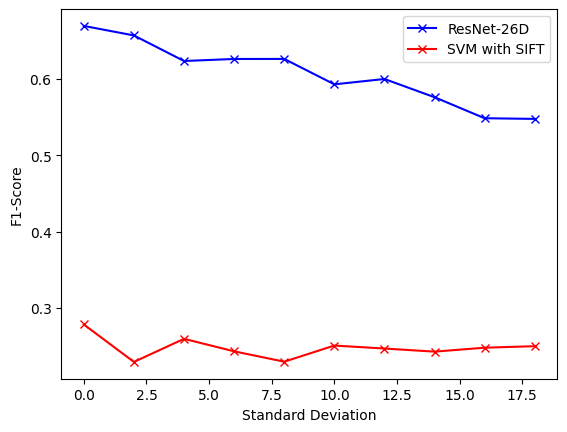

In [51]:
plt.plot(dl_GPN["Value"].tolist(), dl_GPN["F1-Macro"].tolist(), 'b', marker = 'x')
plt.plot(dl_GPN["Value"].tolist(), svm_GPN["f-1"].tolist(), 'r', marker = 'x')
plt.xlabel("Standard Deviation")
plt.ylabel("F1-Score")
plt.legend(['ResNet-26D', 'SVM with SIFT'])
plt.savefig("Gaussian pixel noise.pdf", format="pdf", bbox_inches="tight")
plt.show()

# Gaussian blurring

In [47]:
dl_GB = dl[dl["Perturbation"]=="Gaussian Blur"]

In [48]:
svm_GB = pd.read_csv("Robustness_Testing_Results_SVM/Gaussian blurring.csv")

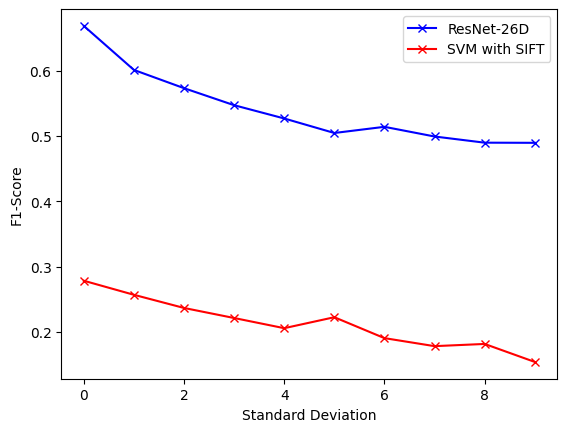

In [52]:
plt.plot(dl_GB["Value"].tolist(), dl_GB["F1-Macro"].tolist(), 'b', marker = 'x')
plt.plot(dl_GB["Value"].tolist(), svm_GB["f-1"].tolist(), 'r', marker = 'x')
plt.xlabel("Standard Deviation")
plt.ylabel("F1-Score")
plt.legend(['ResNet-26D', 'SVM with SIFT'])
plt.savefig("Gaussian blurring.pdf", format="pdf", bbox_inches="tight")
plt.show()

# Image Contrast Increase 

In [54]:
dl_ICI = dl[dl["Perturbation"]=="Contrast Increase"]
svm_ICI = pd.read_csv("Robustness_Testing_Results_SVM/Image Contrast Increase.csv")

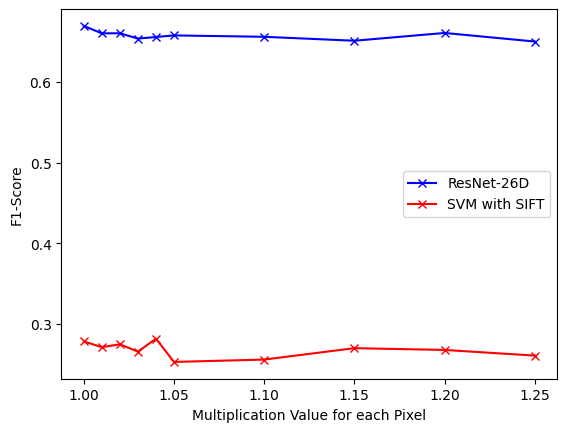

In [55]:
plt.plot(dl_ICI["Value"].tolist(), dl_ICI["F1-Macro"].tolist(), 'b', marker = 'x')
plt.plot(dl_ICI["Value"].tolist(), svm_ICI["f-1"].tolist(), 'r', marker = 'x')
plt.xlabel("Multiplication Value for each Pixel")
plt.ylabel("F1-Score")
plt.legend(['ResNet-26D', 'SVM with SIFT'])
plt.savefig("Image Contrast Increase.pdf", format="pdf", bbox_inches="tight")
plt.show()

# Image Contrast Decrease 

In [90]:
dl_ICD = dl[dl["Perturbation"]=="Contrast Decrease"]
svm_ICD = pd.read_csv("Robustness_Testing_Results_SVM/Image Contrast Decrease.csv")

In [95]:
l = dl_ICD["Value"].tolist()
l = l[::-1]
d = dl_ICD["F1-Macro"].tolist()
d = d[::-1]
svm_ICD["f-1"].tolist()
d

[0.6695076474348219,
 0.6696665954775196,
 0.6599123285219513,
 0.6419483937441124,
 0.6387585013286836,
 0.6298089492233571,
 0.5898649477587268,
 0.5528156350087943,
 0.4822511878478533,
 0.24330587901691]

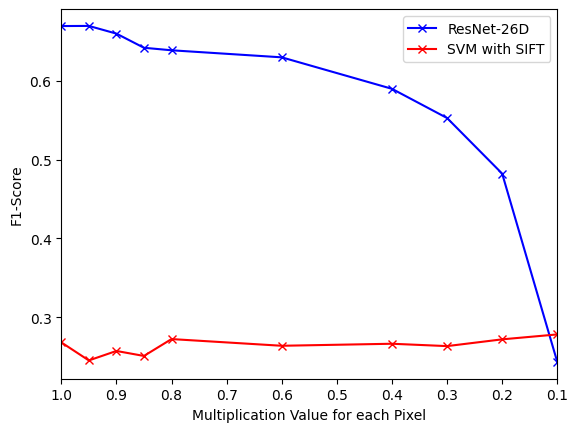

In [102]:
plt.plot(dl_ICD["Value"].tolist(), dl_ICD["F1-Macro"].tolist(), 'b', marker = 'x')
plt.plot(dl_ICD["Value"].tolist(), svm_ICD["f-1"].tolist(), 'r', marker = 'x')
plt.xlabel("Multiplication Value for each Pixel")
plt.ylabel("F1-Score")
plt.legend(['ResNet-26D', 'SVM with SIFT'])
plt.xlim(max(dl_ICD["Value"].tolist()), 0.1)
plt.savefig("Image Contrast Decrease.pdf", format="pdf", bbox_inches="tight")
plt.show()

# Image Brightness Increase 

In [74]:
dl_IBI = dl[dl["Perturbation"]=="Brightness Increase"]
svm_IBI = pd.read_csv("Robustness_Testing_Results_SVM/Image Brightness Increase.csv")

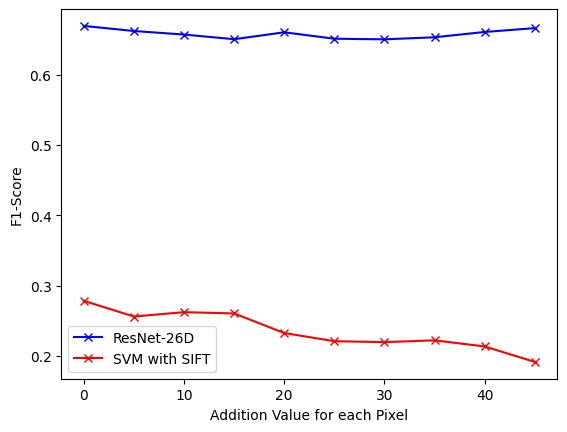

In [75]:
plt.plot(dl_IBI["Value"].tolist(), dl_IBI["F1-Macro"].tolist(), 'b', marker = 'x')
plt.plot(dl_IBI["Value"].tolist(), svm_IBI["f-1"].tolist(), 'r', marker = 'x')
plt.xlabel("Addition Value for each Pixel")
plt.ylabel("F1-Score")
plt.legend(['ResNet-26D', 'SVM with SIFT'])
plt.savefig("Image Brightness Increase.pdf", format="pdf", bbox_inches="tight")
plt.show()

# Image Brightness Decrease

In [79]:
dl_IBD = dl[dl["Perturbation"]=="Brightness Decrease"]
svm_IBD = pd.read_csv("Robustness_Testing_Results_SVM/Image Brightness Decrease.csv")

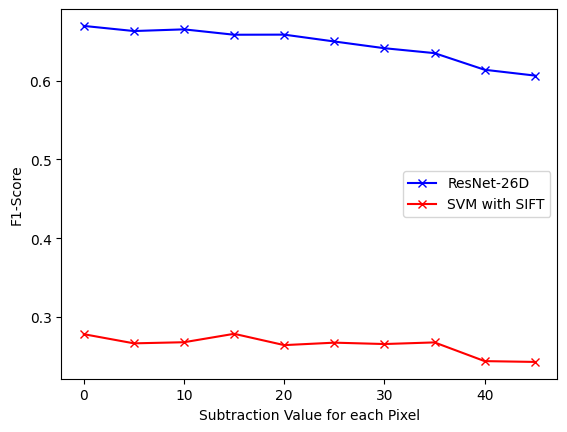

In [80]:
plt.plot(dl_IBD["Value"].tolist(), dl_IBD["F1-Macro"].tolist(), 'b', marker = 'x')
plt.plot(dl_IBD["Value"].tolist(), svm_IBD["f-1"].tolist(), 'r', marker = 'x')
plt.xlabel("Subtraction Value for each Pixel")
plt.ylabel("F1-Score")
plt.legend(['ResNet-26D', 'SVM with SIFT'])
plt.savefig("Image Brightness Decrease.pdf", format="pdf", bbox_inches="tight")
plt.show()

# Occlusion of the Image Increase

In [83]:
dl_IBD = dl[dl["Perturbation"]=="Occlusion"]
svm_IBD = pd.read_csv("Robustness_Testing_Results_SVM/Occlusion of the Image Increase.csv")

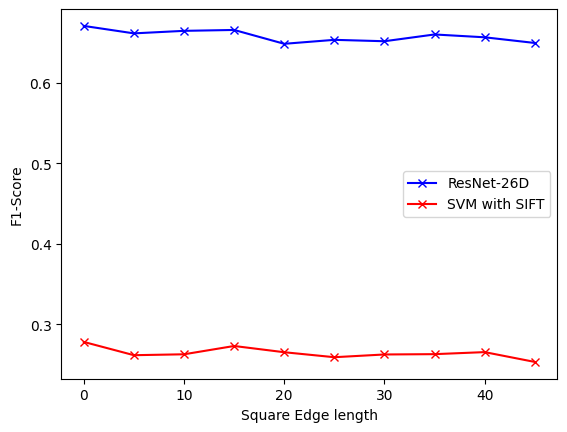

In [84]:
plt.plot(dl_IBD["Value"].tolist(), dl_IBD["F1-Macro"].tolist(), 'b', marker = 'x')
plt.plot(dl_IBD["Value"].tolist(), svm_IBD["f-1"].tolist(), 'r', marker = 'x')
plt.xlabel("Square Edge length")
plt.ylabel("F1-Score")
plt.legend(['ResNet-26D', 'SVM with SIFT'])
plt.savefig("Occlusion.pdf", format="pdf", bbox_inches="tight")
plt.show()

# Salt and Pepper Noise 

In [85]:
dl_IBD = dl[dl["Perturbation"]=="Salt And Pepper"]
svm_IBD = pd.read_csv("Robustness_Testing_Results_SVM/Salt and Pepper Noise.csv")

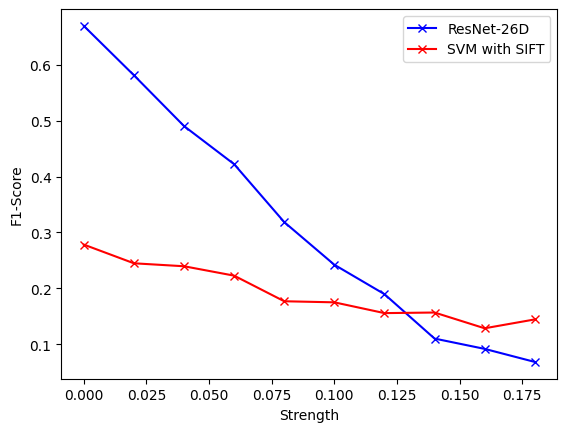

In [86]:
plt.plot(dl_IBD["Value"].tolist(), dl_IBD["F1-Macro"].tolist(), 'b', marker = 'x')
plt.plot(dl_IBD["Value"].tolist(), svm_IBD["f-1"].tolist(), 'r', marker = 'x')
plt.xlabel("Strength")
plt.ylabel("F1-Score")
plt.legend(['ResNet-26D', 'SVM with SIFT'])
plt.savefig("Salt and Pepper Noise.pdf", format="pdf", bbox_inches="tight")
plt.show()